In [3]:
#DS Basics

import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#SKLearn Stuff

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [5]:
#helpers
%matplotlib inline

In [6]:
data = pd.read_csv('default of credit card clients1.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TYPE,Pendings
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,1
1,2,120000,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,1
2,3,90000,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,0
3,4,50000,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,0
4,5,50000,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,0


In [7]:
data = data.drop_duplicates()

In [8]:
#select columns
data1 = data.loc[:, ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','TYPE']] 
print('Selected Columns')
data1.head()

Selected Columns


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,TYPE
0,20000,female,university,1,24,default
1,120000,female,university,2,26,default
2,90000,female,university,2,34,not default
3,50000,female,university,1,37,not default
4,50000,male,university,1,57,not default


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  int64 
 4   AGE        30000 non-null  int64 
 5   TYPE       30000 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.6+ MB


In [10]:
#AGE BIN
bins = [0,25,43,54,85]
#group names
gen = ['Gen Z','Millennial','Gen X','Boomer']

In [11]:
data1['Generation'] = pd.cut(data1.AGE, bins, labels = gen)

In [12]:
#CREDIT LIMIT BIN 
binslimit = [0,100000,200000,300000,1000000]
#group names
limits = ['Low','Med','High','Extra']

In [13]:
data1['LIMIT_BIN'] = pd.cut(data1.LIMIT_BAL, binslimit, labels = limits)

In [14]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,TYPE,Generation,LIMIT_BIN
0,20000,female,university,1,24,default,Gen Z,Low
1,120000,female,university,2,26,default,Millennial,Med
2,90000,female,university,2,34,not default,Millennial,Low
3,50000,female,university,1,37,not default,Millennial,Low
4,50000,male,university,1,57,not default,Boomer,Low


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LIMIT_BAL   30000 non-null  int64   
 1   SEX         30000 non-null  object  
 2   EDUCATION   30000 non-null  object  
 3   MARRIAGE    30000 non-null  int64   
 4   AGE         30000 non-null  int64   
 5   TYPE        30000 non-null  object  
 6   Generation  30000 non-null  category
 7   LIMIT_BIN   30000 non-null  category
dtypes: category(2), int64(3), object(3)
memory usage: 1.7+ MB


In [16]:
#label encoding
le = LabelEncoder()
le.fit(data1['SEX'])


LabelEncoder()

In [17]:
data1['SEX'] = le.transform(data1['SEX'])

In [18]:
le1 = LabelEncoder()
le1.fit(data1['EDUCATION'])

LabelEncoder()

In [19]:
data1['EDUCATION'] = le1.transform(data1['EDUCATION'])

In [20]:
le2 = LabelEncoder()
le2.fit(data1['TYPE'])

LabelEncoder()

In [21]:
data1['TYPE'] = le2.transform(data1['TYPE'])

In [22]:
le3 = LabelEncoder()
le3.fit(data1['Generation'])

LabelEncoder()

In [23]:
data1['Generation'] = le3.transform(data1['Generation'])

In [24]:
le4 = LabelEncoder()
le4.fit(data1['LIMIT_BIN'])

LabelEncoder()

In [25]:
data1['LIMIT_BIN'] = le4.transform(data1['LIMIT_BIN'])

In [26]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,TYPE,Generation,LIMIT_BIN
0,20000,0,3,1,24,0,2,2
1,120000,0,3,2,26,0,3,3
2,90000,0,3,2,34,1,3,2
3,50000,0,3,1,37,1,3,2
4,50000,1,3,1,57,1,0,2


In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LIMIT_BAL   30000 non-null  int64
 1   SEX         30000 non-null  int32
 2   EDUCATION   30000 non-null  int32
 3   MARRIAGE    30000 non-null  int64
 4   AGE         30000 non-null  int64
 5   TYPE        30000 non-null  int32
 6   Generation  30000 non-null  int32
 7   LIMIT_BIN   30000 non-null  int32
dtypes: int32(5), int64(3)
memory usage: 1.5 MB


In [28]:
data1.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,TYPE,Generation,LIMIT_BIN
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,1.598100,1.551867,35.485500,0.778800,2.436800,1.789833
std,129747.661567,0.489129,1.371656,0.521970,9.217904,0.415062,0.886284,0.997779
min,10000.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,0.000000,1.000000,28.000000,1.000000,2.000000,1.000000
50%,140000.000000,0.000000,1.000000,2.000000,34.000000,1.000000,3.000000,2.000000
75%,240000.000000,1.000000,3.000000,2.000000,41.000000,1.000000,3.000000,3.000000
max,1000000.000000,1.000000,3.000000,3.000000,79.000000,1.000000,3.000000,3.000000


In [29]:
data1.groupby('SEX')['AGE'].mean(),data1.groupby('SEX')['AGE'].max(),data.groupby('SEX')['AGE'].min()

(SEX
 0    34.806868
 1    36.519431
 Name: AGE, dtype: float64,
 SEX
 0    75
 1    79
 Name: AGE, dtype: int64,
 SEX
 female    21
 male      21
 Name: AGE, dtype: int64)

In [30]:
data1.groupby('SEX')['LIMIT_BAL'].mean(),data1.groupby('SEX')['LIMIT_BAL'].max(),data.groupby('SEX')['LIMIT_BAL'].min()

(SEX
 0    170086.462014
 1    163519.825034
 Name: LIMIT_BAL, dtype: float64,
 SEX
 0    1000000
 1     800000
 Name: LIMIT_BAL, dtype: int64,
 SEX
 female    10000
 male      10000
 Name: LIMIT_BAL, dtype: int64)

In [31]:
data1.groupby('MARRIAGE')['AGE'].mean(),data1.groupby('MARRIAGE')['AGE'].max(),data.groupby('MARRIAGE')['AGE'].min()

(MARRIAGE
 0    37.814815
 1    40.016692
 2    31.452706
 3    42.798762
 Name: AGE, dtype: float64,
 MARRIAGE
 0    56
 1    79
 2    70
 3    65
 Name: AGE, dtype: int64,
 MARRIAGE
 0    23
 1    21
 2    21
 3    22
 Name: AGE, dtype: int64)

In [32]:
data1.groupby('EDUCATION')['AGE'].mean(),data1.groupby('EDUCATION')['AGE'].max(),data.groupby('EDUCATION')['AGE'].min()

(EDUCATION
 0    34.231838
 1    40.299980
 2    36.143162
 3    34.722096
 Name: AGE, dtype: float64,
 EDUCATION
 0    79
 1    74
 2    66
 3    75
 Name: AGE, dtype: int64,
 EDUCATION
 graduate school    21
 high school        21
 other              21
 university         21
 Name: AGE, dtype: int64)

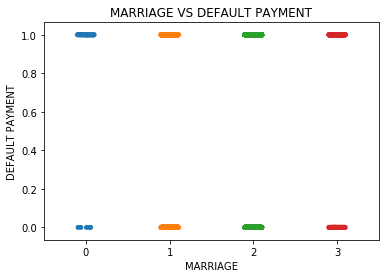

In [33]:
sns.stripplot(data1.MARRIAGE, data1.TYPE, jitter=True)
plt.title('MARRIAGE VS DEFAULT PAYMENT')
plt.xlabel('MARRIAGE')
plt.ylabel('DEFAULT PAYMENT')
plt.show()

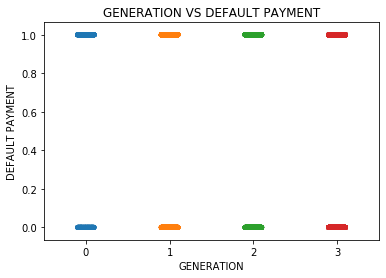

In [34]:
sns.stripplot(data1.Generation, data1.TYPE, jitter=True)
plt.title('GENERATION VS DEFAULT PAYMENT')
plt.xlabel('GENERATION')
plt.ylabel('DEFAULT PAYMENT')
plt.show()

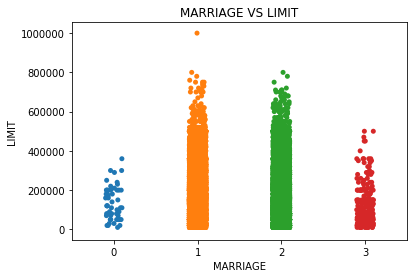

In [35]:
sns.stripplot(data1.MARRIAGE, data1.LIMIT_BAL, jitter=True)
plt.title('MARRIAGE VS LIMIT')
plt.xlabel('MARRIAGE')
plt.ylabel('LIMIT')
plt.show()

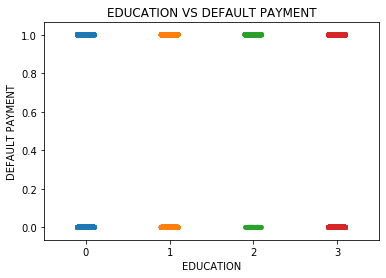

In [36]:
sns.stripplot(data1.EDUCATION, data1.TYPE, jitter=True)
plt.title('EDUCATION VS DEFAULT PAYMENT')
plt.xlabel('EDUCATION')
plt.ylabel('DEFAULT PAYMENT')
plt.show()

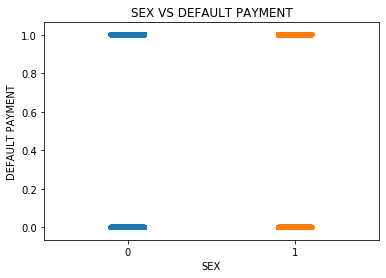

In [37]:
sns.stripplot(data1.SEX, data1.TYPE, jitter=True)
plt.title('SEX VS DEFAULT PAYMENT')
plt.xlabel('SEX')
plt.ylabel('DEFAULT PAYMENT')
plt.show()

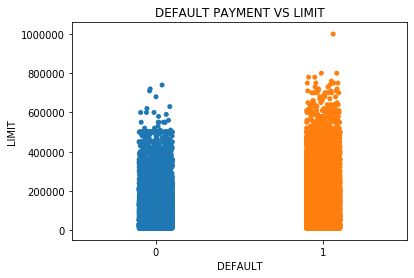

In [38]:
sns.stripplot(data1.TYPE, data1.LIMIT_BAL, jitter=True)
plt.title('DEFAULT PAYMENT VS LIMIT')
plt.xlabel('DEFAULT')
plt.ylabel('LIMIT')
plt.show()

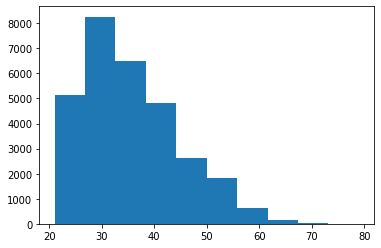

In [39]:
plt.hist(data.AGE, bins=10)
plt.show()

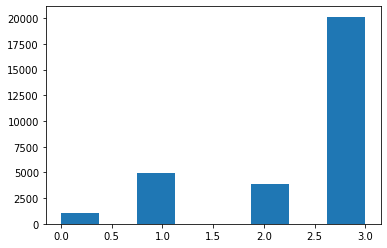

In [40]:
plt.hist(data1.Generation, bins=8)
plt.show()

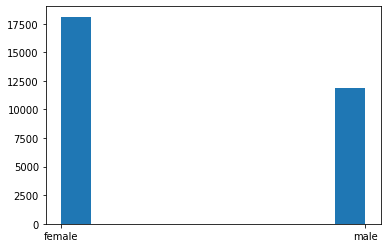

In [41]:
plt.hist(data.SEX, bins=10)
plt.show()

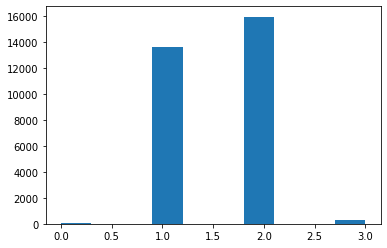

In [42]:
plt.hist(data1.MARRIAGE, bins=10)
plt.show()

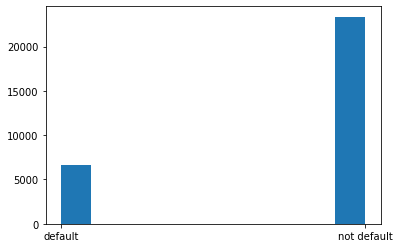

In [43]:
plt.hist(data.TYPE, bins=10)
plt.show()

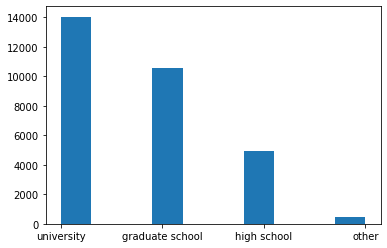

In [44]:
plt.hist(data.EDUCATION, bins=10)
plt.show()

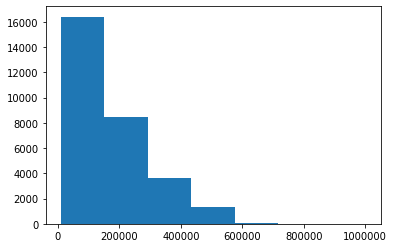

In [45]:
plt.hist(data.LIMIT_BAL, bins=7)
plt.show()

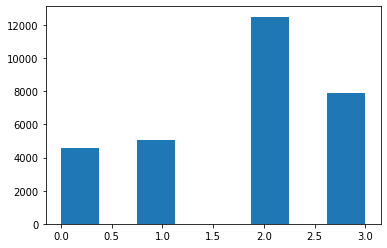

In [46]:
plt.hist(data1.LIMIT_BIN, bins=8)
plt.show()

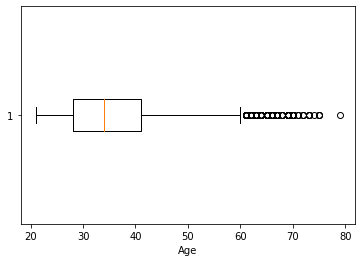

In [47]:
plt.boxplot(data1.AGE, vert=False)
plt.xlabel('Age')
plt.show()

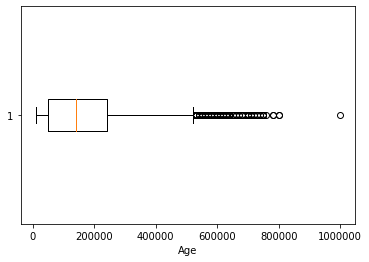

In [48]:
plt.boxplot(data1.LIMIT_BAL, vert=False)
plt.xlabel('Age')
plt.show()

In [68]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,TYPE,Generation,LIMIT_BIN
0,20000,0,3,1,24,0,2,2
1,120000,0,3,2,26,0,3,3
2,90000,0,3,2,34,1,3,2
3,50000,0,3,1,37,1,3,2
4,50000,1,3,1,57,1,0,2


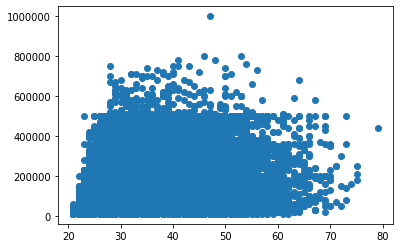

In [69]:
x = data1['AGE']
y = data1['LIMIT_BAL']
plt.scatter(x,y, marker='o')
plt.show()

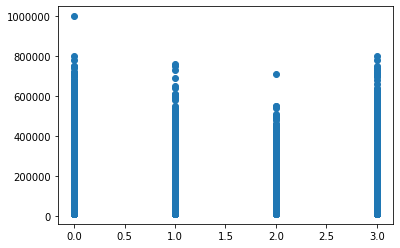

In [70]:
x = data1['EDUCATION']
y = data1['LIMIT_BAL']
plt.scatter(x,y, marker='o')
plt.show()

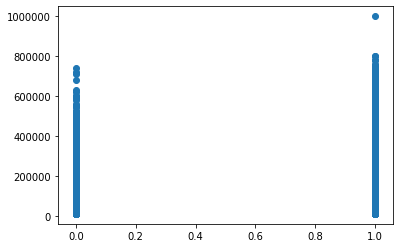

In [71]:
x = data1['TYPE']
y = data1['LIMIT_BAL']
plt.scatter(x,y, marker='o')
plt.show()

In [67]:
corr_mat = data1.corr()
print(corr_mat)

            LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE      TYPE  \
LIMIT_BAL    1.000000 -0.024755  -0.196273 -0.108139  0.144713  0.153520   
SEX         -0.024755  1.000000  -0.027139  0.031389  0.090874 -0.039961   
EDUCATION   -0.196273 -0.027139   1.000000 -0.087956 -0.020678 -0.040284   
MARRIAGE    -0.108139  0.031389  -0.087956  1.000000 -0.414170  0.024339   
AGE          0.144713  0.090874  -0.020678 -0.414170  1.000000 -0.013890   
TYPE         0.153520 -0.039961  -0.040284  0.024339 -0.013890  1.000000   
Generation   0.093038 -0.036039  -0.023157  0.160423 -0.621563  0.044185   
LIMIT_BIN   -0.685946 -0.019708   0.108070  0.065190 -0.097603 -0.073059   

            Generation  LIMIT_BIN  
LIMIT_BAL     0.093038  -0.685946  
SEX          -0.036039  -0.019708  
EDUCATION    -0.023157   0.108070  
MARRIAGE      0.160423   0.065190  
AGE          -0.621563  -0.097603  
TYPE          0.044185  -0.073059  
Generation    1.000000  -0.011421  
LIMIT_BIN    -0.011421   1.

In [50]:
cov_mat = data1.cov()
print(cov_mat)

               LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL   1.683446e+10 -1571.050630 -34930.604407 -7323.669658   
SEX        -1.571051e+03     0.239247     -0.018208     0.008014   
EDUCATION  -3.493060e+04    -0.018208      1.881439    -0.062974   
MARRIAGE   -7.323670e+03     0.008014     -0.062974     0.272452   
AGE         1.730767e+05     0.409726     -0.261453    -1.992764   
TYPE        8.267552e+03    -0.008113     -0.022934     0.005273   
Generation  1.069873e+04    -0.015623     -0.028151     0.074214   
LIMIT_BIN  -8.880218e+04    -0.009618      0.147906     0.033952   

                      AGE         TYPE    Generation     LIMIT_BIN  
LIMIT_BAL   173076.722569  8267.551759  10698.727150 -88802.183592  
SEX              0.409726    -0.008113     -0.015623     -0.009618  
EDUCATION       -0.261453    -0.022934     -0.028151      0.147906  
MARRIAGE        -1.992764     0.005273      0.074214      0.033952  
AGE             84.969755    -0.053143    

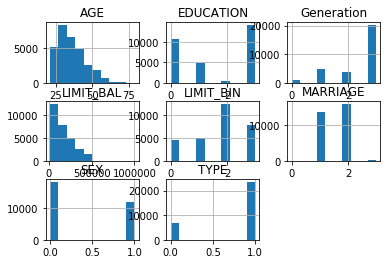

In [51]:
# Visualizations

data1.hist()
plt.show()

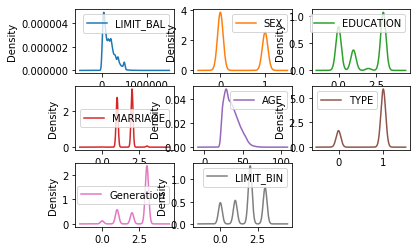

In [52]:
data1.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

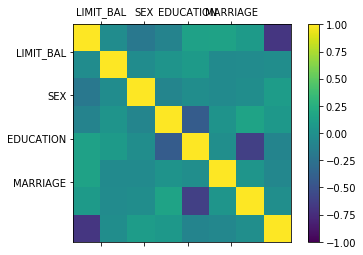

In [53]:

# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy
names = data.loc[:, ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','TYPE']]
correlations = data1.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(.5,6,1.6)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

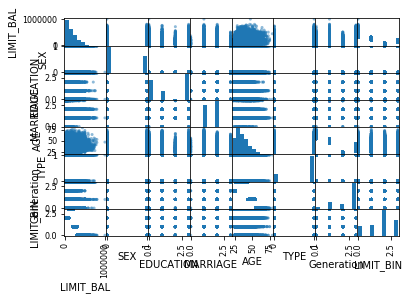

In [54]:

# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix

scatter_matrix(data1)
plt.show()


In [55]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,TYPE,Generation,LIMIT_BIN
0,20000,0,3,1,24,0,2,2
1,120000,0,3,2,26,0,3,3
2,90000,0,3,2,34,1,3,2
3,50000,0,3,1,37,1,3,2
4,50000,1,3,1,57,1,0,2


In [56]:
datafinal = data1.iloc[: , [1, 2, 3, 5, 6, 7]]

In [57]:
datafinal.head()

,SEX,EDUCATION,MARRIAGE,TYPE,Generation,LIMIT_BIN
0,0,3,1,0,2,2
1,0,3,2,0,3,3
2,0,3,2,1,3,2
3,0,3,1,1,3,2
4,1,3,1,1,0,2


In [58]:
#MODELING
# features
X = datafinal.iloc[:,0:5]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,TYPE,Generation
0,0,3,1,0,2
1,0,3,2,0,3
2,0,3,2,1,3
3,0,3,1,1,3
4,1,3,1,1,0


In [59]:
# dependent variable
y = datafinal['LIMIT_BIN']
y.head()

0    2
1    3
2    2
3    2
4    2
Name: LIMIT_BIN, dtype: int32

In [60]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
print(algos_Class)

[('Random Forest Classifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)), ('Decision Tree Classifier', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       r

In [61]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [62]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.4609666666666667
Decision Tree Classifier 0.46049999999999996
Gradient Boosting Classifier 0.4625666666666666


In [63]:
#Train Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [64]:
#Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train,y_train)

In [65]:
#Predictions
preds = model.predict(X_test)
print ('Accuracy Gradient'), accuracy_score(y_test, preds)

Accuracy Gradient


(None, 0.46344444444444444)

In [66]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.33      0.14      0.20      1300
           1       0.25      0.00      0.00      1567
           2       0.55      0.82      0.65      3769
           3       0.32      0.38      0.35      2364

    accuracy                           0.46      9000
   macro avg       0.36      0.34      0.30      9000
weighted avg       0.40      0.46      0.40      9000

